In [1]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def entrenar_modelo_iris():
    # Configurar MLflow
    mlflow.set_experiment("clasificacion_iris_detallada")
    
    # Cargar datos
    iris = load_iris()
    X, y = iris.data, iris.target
    
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Iniciar run de MLflow
    with mlflow.start_run():
        # Crear modelo de Regresión Logística
        modelo = LogisticRegression(max_iter=200, multi_class='ovr')
        modelo.fit(X_train_scaled, y_train)
        
        # Predecir
        predicciones = modelo.predict(X_test_scaled)
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, predicciones)
        
        # Matriz de Confusión
        cm = confusion_matrix(y_test, predicciones)
        
        # Visualizar Matriz de Confusión
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=iris.target_names, 
                    yticklabels=iris.target_names)
        plt.title('Matriz de Confusión - Clasificación Iris')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.tight_layout()
        
        # Guardar figura
        plt.savefig('confusion_matrix.png')
        
        # Registrar métricas y parámetros en MLflow
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_param("modelo", "Regresión Logística")
        mlflow.log_param("max_iter", 200)
        
        # Registrar la imagen de la matriz de confusión
        mlflow.log_artifact('confusion_matrix.png')
        
        # Guardar modelo
        mlflow.sklearn.log_model(modelo, "modelo_iris")
        
        # Imprimir resultados
        print("Accuracy:", accuracy)
        print("\nReporte de Clasificación:")
        print(classification_report(y_test, predicciones, target_names=iris.target_names))

        import subprocess
import sys
import os
import subprocess

import webbrowser
import threading
import subprocess



c:\Users\guill\OneDrive\Documentos\MLFlow\nombredelentorno\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
2025/03/28 19:22:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.9666666666666667

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

🏃 View run enchanting-grub-652 at: http://localhost:5000/#/experiments/1/runs/ce991b8900c941348f853f7c682930ff
🧪 View experiment at: http://localhost:5000/#/experiments/1


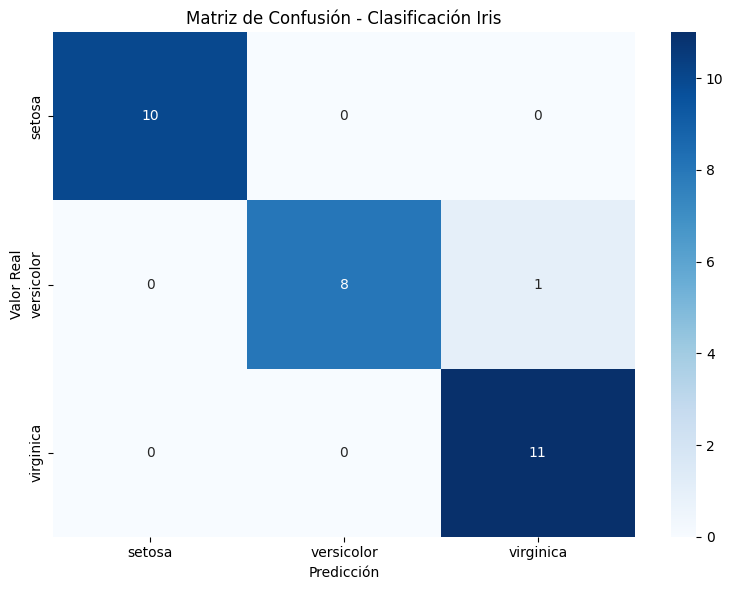

In [3]:
mlflow.set_tracking_uri("http://localhost:5000")  # o la IP donde esté el Docker
entrenar_modelo_iris()